In [76]:
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
%matplotlib inline
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.metrics import confusion_matrix
import seaborn as sns
import pandas as pd
from keras.datasets import mnist
import tensorflow as tf

np.random.seed(123)

#Dataset

In [77]:
(x_train, y_train) , (x_test, y_test) = mnist.load_data()

In [78]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


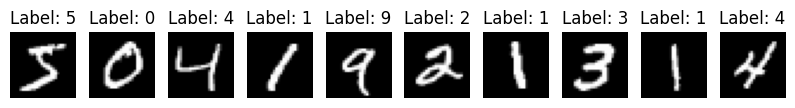

In [79]:
plt.figure(figsize=(10, 2))
for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.show()

In [80]:
def print_image_array(image):
    for row in image:
        for pixel in row:
            print("{:3d}".format(pixel), end="")  # Print each pixel with 3 spaces
        print()  # Move to the next line after each row

# Print the first image
print("First image as array:")
print_image_array(x_train[0])

# Print the first 10 labels
print("\nFirst 10 labels:")
print(y_train[:10])

First image as array:
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  3 18 18 18126136175 26166255247127  0  0  0  0
  0  0  0  0  0  0  0  0 30 36 94154170253253253253253225172253242195 64  0  0  0  0
  0  0  0  0  0  0  0 49238253253253253253253253253251 93 82 82 56 39  0  0  0  0  0
  0  0  0  0  0  0  0 18219253253253253253198182247241  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0 80156107253253205 11  0 43154  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0 14  1154253 90  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0139253190 

#Pre Processing

In [81]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [82]:
x_train = x_train.reshape((x_train.shape[0], 28 * 28))  # Flatten images
x_test = x_test.reshape((x_test.shape[0], 28 * 28))

To Categorical

In [83]:
print("Labels before to_categorical:")
for i in range(5):
    print(f"Label {i}: {y_train[i]}")

num_classes = 10
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

print("\nLabels after to_categorical:")
for i in range(5):
    print(f"Label {i}: {y_train[i]}")

Labels before to_categorical:
Label 0: 5
Label 1: 0
Label 2: 4
Label 3: 1
Label 4: 9

Labels after to_categorical:
Label 0: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
Label 1: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Label 2: [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
Label 3: [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
Label 4: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


#Modeling

In [84]:
model = Sequential()

model.add(Dense(units = 128, activation='relu', input_shape=(784,)))
model.add(Dropout(0.25))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#Train

In [85]:
model.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_test, y_test))

Epoch 1/10
469/469 [==============================] - 4s 8ms/step - loss: 0.3827 - accuracy: 0.8876 - val_loss: 0.1505 - val_accuracy: 0.9529
Epoch 2/10
469/469 [==============================] - 2s 5ms/step - loss: 0.1656 - accuracy: 0.9505 - val_loss: 0.1057 - val_accuracy: 0.9667
Epoch 3/10
469/469 [==============================] - 2s 5ms/step - loss: 0.1246 - accuracy: 0.9614 - val_loss: 0.0909 - val_accuracy: 0.9711
Epoch 4/10
469/469 [==============================] - 2s 5ms/step - loss: 0.1047 - accuracy: 0.9679 - val_loss: 0.0854 - val_accuracy: 0.9721
Epoch 5/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0878 - accuracy: 0.9729 - val_loss: 0.0749 - val_accuracy: 0.9767
Epoch 6/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0797 - accuracy: 0.9747 - val_loss: 0.0759 - val_accuracy: 0.9766
Epoch 7/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0712 - accuracy: 0.9771 - val_loss: 0.0697 - val_accuracy: 0.9779
Epoch 

#Evaluation

In [86]:
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

Test loss: 0.07162922620773315
Test accuracy: 0.9793000221252441


#Prediction

In [87]:
y_pred_probs = model.predict(x_test)
y_pred = np.argmax(y_pred_probs, axis=1)

# Convert y_test to class labels for comparison
y_test_labels = np.argmax(y_test, axis=1)  # Extract class labels from one-hot encoding

# Calculate accuracy
correct_predictions = np.sum(y_pred == y_test_labels)
total_predictions = len(y_test_labels)
prediction_accuracy = correct_predictions / total_predictions
print("Prediction Accuracy:", prediction_accuracy)

313/313 [==============================] - 1s 2ms/step
Prediction Accuracy: 0.9793


#Visualisasi

In [95]:
correct_predictions = np.sum(y_pred == y_test_labels)
wrong_predictions = total_predictions - correct_predictions

print("Number of correct predictions:", correct_predictions)
print("Number of wrong predictions:", wrong_predictions)

Number of correct predictions: 9793
Number of wrong predictions: 207


Perbandingan predicted dan  label asli

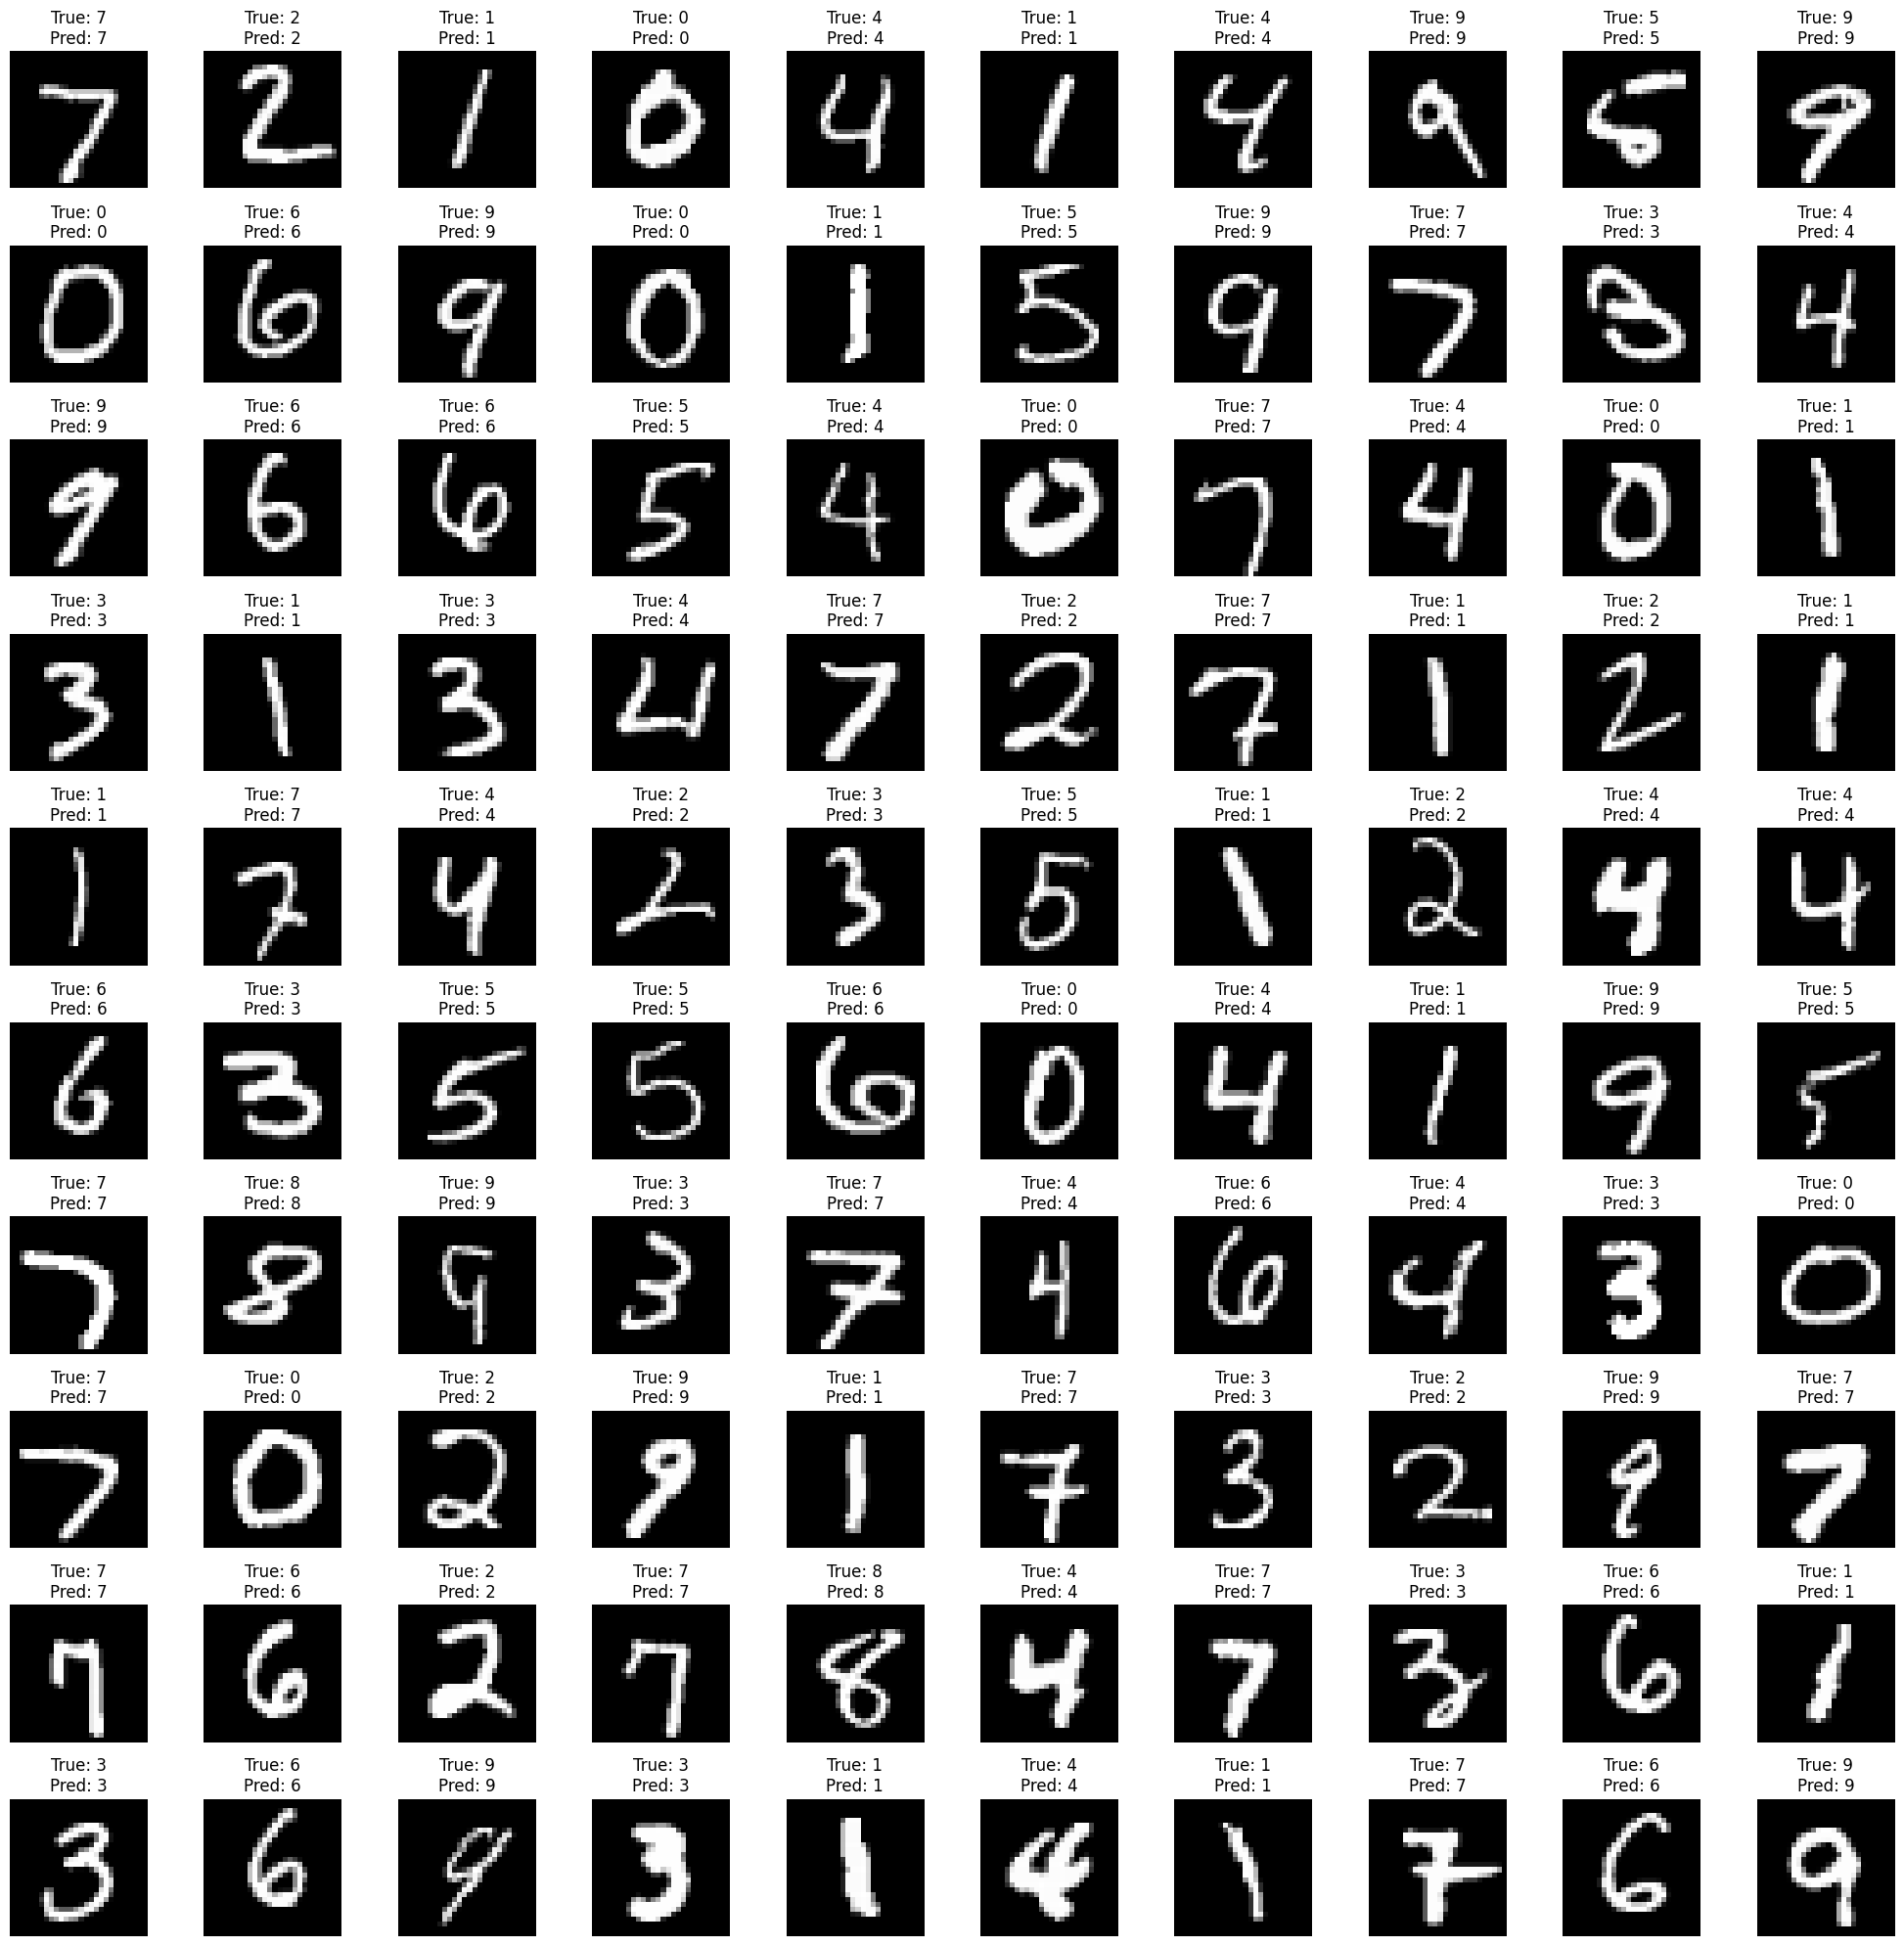

In [93]:
num_rows = 10
num_cols = 10
num_samples = num_rows * num_cols
plt.figure(figsize=(2 * num_cols, 2 * num_rows))

for i in range(num_samples):
    plt.subplot(num_rows, num_cols, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"True: {y_test_labels[i]}\nPred: {y_pred[i]}")
    plt.axis('off')

plt.tight_layout()  # Adjust spacing for better visualization
plt.show()

Prediksi salah

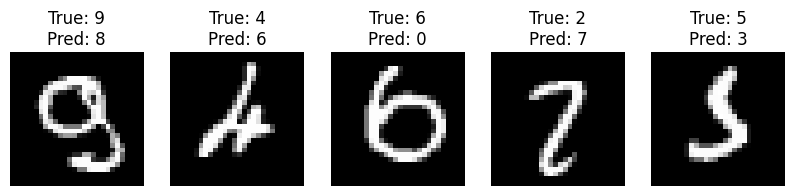

In [94]:
wrong_predictions_indices = np.where(y_pred != y_test_labels)[0]

num_samples = 5
plt.figure(figsize=(10, 2))
for i in range(num_samples):
    index = wrong_predictions_indices[i]
    plt.subplot(1, num_samples, i + 1)
    plt.imshow(x_test[index].reshape(28, 28), cmap='gray')
    plt.title(f"True: {y_test_labels[index]}\nPred: {y_pred[index]}")
    plt.axis('off')
plt.show()

Confusion matrix

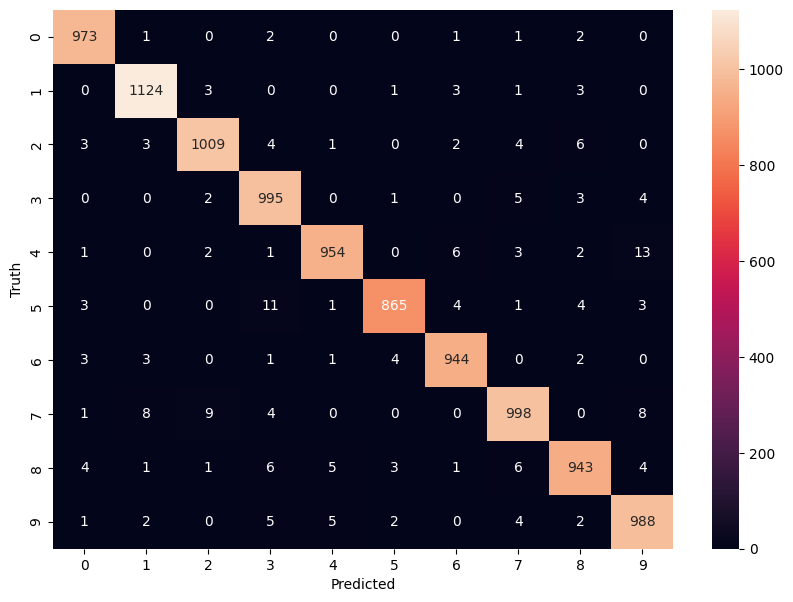

In [89]:
cm = tf.math.confusion_matrix(labels=y_test_labels, predictions=y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()